In [91]:
import numpy as np
from scipy import stats

In [92]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': re

In [93]:
dat = np.random.normal(loc = 1.1, size = 50)
dat.shape

(50,)

In [94]:
Z, pval = stats.ttest_1samp(dat, popmean=1.0)
# Zは検定統計量(今回は期待値loc = 1.1に近い値になるはず)
Z

0.9734133639234073

In [95]:
pval

0.3351289475316437

In [96]:
dat = np.random.normal(loc = 1.1, size = 200)

In [97]:
Z, pval = stats.ttest_1samp(dat, 1.0)
Z

-0.0596231464479188

In [98]:
pval

0.9525156152817686

In [99]:
# ttest_1sampには片側検定がないので両側検定から求める
dat = np.random.normal(loc = 1.1, size = 200)

In [100]:
Z, pval = stats.ttest_1samp(dat, 1.0)
Z

2.36446446411445

In [101]:
pval

0.01901868519278515

In [102]:
# 片側検定(Z > 0)
pval/2

0.009509342596392575

In [103]:
# 2標本検定
# statsにはttest_indに2標本検定を行う関数がある
# データの生成
x = np.random.normal(loc = 1.1, size = 100)
y = np.random.normal(loc = 1.0, size = 500)

In [104]:
# x, yの分散が等しいと仮定
Z, pval = stats.ttest_ind(x, y)
print(Z, pval)

0.5473522216695064 0.5843409844130166


In [105]:
# x, yの分散が異なると仮定
Z, pval = stats.ttest_ind(x, y, equal_var=False)
print(Z, pval)

0.5575204857589618 0.5780375552227384


In [106]:
# ペアの情報の検定
# 1. 一つのものとして検定
# 2. 2標本として検定

In [107]:
x = np.random.normal(loc = 1.1, scale = 1, size = 1000)
y = np.random.normal(loc = 1.0, scale = 1.1, size = 1000)

In [108]:
# 2標本検定: 等分散を仮定しない
Z, pval = stats.ttest_ind(x, y, equal_var=False)
print("Z: {0}\npval: {1}".format(Z, pval))

Z: 2.0843300199540873
pval: 0.0372585634611266


In [109]:
# 2標本検定: 等分散を仮定
Z, pval = stats.ttest_ind(x, y)
print("Z: {0}\npval: {1}".format(Z, pval))

Z: 2.0843300199540873
pval: 0.037256900928186086


In [110]:
# 2標本をペアとして検定
Z, pval = stats.ttest_rel(x, y)
print("Z: {0}\npval: {1}".format(Z, pval))

Z: 2.1083797741563606
pval: 0.03524665846548258


In [111]:
# 2標本をペアとして検定: データを1つに変換させたのち検定
# μ1 = μ2をH0としている
Z, pval = stats.ttest_1samp(x - y, 0)
print("Z: {0}\npval: {1}".format(Z, pval))

Z: 2.1083797741563606
pval: 0.03524665846548258


In [112]:
# ノンパラメトリックな検定手法
# マンホイットニーのU検定
help(stats.mannwhitneyu)

Help on function mannwhitneyu in module scipy.stats.stats:

mannwhitneyu(x, y, use_continuity=True, alternative=None)
    Compute the Mann-Whitney rank test on samples x and y.
    
    Parameters
    ----------
    x, y : array_like
        Array of samples, should be one-dimensional.
    use_continuity : bool, optional
            Whether a continuity correction (1/2.) should be taken into
            account. Default is True.
    alternative : {None, 'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis.
        The following options are available (default is None):
    
          * None: computes p-value half the size of the 'two-sided' p-value and
            a different U statistic. The default behavior is not the same as
            using 'less' or 'greater'; it only exists for backward compatibility
            and is deprecated.
          * 'two-sided'
          * 'less': one-sided
          * 'greater': one-sided
    
        Use of the None opt

In [113]:
# 例1: 同じ分布に従う標本
x = np.random.normal(loc = 1, size = 500)
y = np.random.normal(loc = 1, size = 300)

In [114]:
# 両側検定
r, pval = stats.mannwhitneyu(x, y, alternative='two-sided')
print("r: {}\npval: {}".format(r, pval))

r: 70753.0
pval: 0.1795886335433372


In [115]:
# 例２: 同じ期待値の分布に従う標本(分布は異なる)
x = np.random.normal(loc = 1, scale = 2, size = 500)
y = np.random.normal(loc = 1, scale = 1, size = 300)

In [116]:
# 両側検定
r, pval = stats.mannwhitneyu(x, y, alternative='two-sided')
print("r: {}\npval: {}".format(r, pval))

r: 71855.0
pval: 0.32034103612897236


In [117]:
# 例3: 異なる期待値の分布に従う標本
x = np.random.normal(loc = 1.2, size = 500)
y = np.random.normal(loc = 1, size = 300)

In [118]:
# 両側検定
r, pval = stats.mannwhitneyu(x, y, alternative='two-sided')
print("r: {}\npval: {}".format(r, pval))

r: 87921.0
pval: 4.4406453799898546e-05


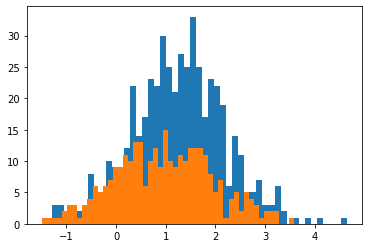

In [119]:
import matplotlib.pyplot as plt
plt.hist(x, bins = 50)
plt.hist(y, bins = 50)
plt.show();

In [120]:
# コルモゴロフ-スミルノフ(KS)検定
# KS検定では分布の違いを検出できる
help(stats.ks_2samp)

Help on function ks_2samp in module scipy.stats.stats:

ks_2samp(data1, data2, alternative='two-sided', mode='auto')
    Compute the Kolmogorov-Smirnov statistic on 2 samples.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    are drawn from the same continuous distribution.  The alternative hypothesis
    can be either 'two-sided' (default), 'less' or 'greater'.
    
    Parameters
    ----------
    data1, data2 : array_like, 1-Dimensional
        Two arrays of sample observations assumed to be drawn from a continuous
        distribution, sample sizes can be different.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis.
        The following options are available (default is 'two-sided'):
    
          * 'two-sided'
          * 'less': one-sided, see explanation in Notes
          * 'greater': one-sided, see explanation in Notes
    mode : {'auto', 'exact', 'asymp'}, optional
        Defines 

In [121]:
# KS検定ではU検定とは異なり、同じ期待値を持つ異なる分布の違いを検出できる

In [122]:
# 同じ分布に従う標本
x = np.random.normal(loc = 1, size = 500)
y = np.random.normal(loc = 1, size = 300)

In [123]:
D, pval = stats.ks_2samp(x, y)
print("D: {}\npval: {}".format(D, pval))

D: 0.042
pval: 0.8827463499336298


In [124]:
# 同じ期待値で分散が異なる分布に従う標本
x = np.random.normal(loc = 1, scale = 2, size = 500)
y = np.random.normal(loc = 1, size = 300)

In [125]:
D, pval = stats.ks_2samp(x, y)
print("D: {}\npval: {}".format(D, pval))

D: 0.21533333333333332
pval: 4.383633711579904e-08


In [126]:
# 分散分析(ANOVA: analysis of variance)は実験における条件の違いが結果に影響するかどうかを判定する
# 具体的には2標本以上の標本について期待値の同等性を検定する(2標本検定の拡張)
# H0: μ1＝μ2＝・・・＝μa (a種類の実験方法で得られたデータ群の期待値)
# H1: 異なる期待値が少なくとも1つ存在する
# 分散分析の用語では、観測値に影響を与える設定のことを因子、各a種類の実験方法を水準という
# 考えている因子数が1の場合の仮設検定の枠組みを1元配置分散分析という
help(stats.f_oneway)

Help on function f_oneway in module scipy.stats.stats:

f_oneway(*args, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    F_onewayConstantInputWarning
        Raised if each of the input arrays is constant arra

In [127]:
# 帰無仮説が正しい: 水準数は5, 各水準で10データ
x1, x2, x3, x4, x5 = np.random.normal(size = 50).reshape(5, 10)

In [128]:
F, pval = stats.f_oneway(x1, x2, x3, x4, x5)
print("F: {}\npval: {}".format(F, pval))

F: 0.36214194840392433
pval: 0.8342307187731435


In [129]:
# 帰無仮説は間違い: 水準数は6, 各水準は20データ
x1, x2, x3, x4, x5, x6 = np.r_[np.random.normal(size = 100), np.random.normal(loc = 0.7, size = 20)].reshape(6, 20)

In [130]:
F, pval = stats.f_oneway(x1, x2, x3, x4, x5, x6)
print("F: {}\npval: {}".format(F, pval))

F: 2.4623957238659973
pval: 0.03700099363384216


In [131]:
from sklearn.datasets import load_iris

In [132]:
iris = load_iris()

In [133]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [134]:
# 花の種類とガクの長さ(sepal length)の関係をANOVAで調べる
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [135]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [136]:
x0 = iris.data[iris.target == 0, 0]
x1 = iris.data[iris.target == 1, 0]
x2 = iris.data[iris.target == 2, 0]

In [137]:
iris.data.shape

(150, 4)

In [138]:
F, pval = stats.f_oneway(x0, x1, x2)
print("F: {}\npval: {}".format(F, pval))

F: 119.26450218450468
pval: 1.6696691907693826e-31


In [139]:
# 結論は花の種類が異なると、ガクの長さが異なるということ